# Smishing classification using the RNN algorithm.

I've competed the contest about financial letters analysis. I should classify which text is smishing or not by using the big data. So I got the data that include ID, text, smishing data(1 or 0). I've tried to do the text mining in korean letter for input to RNN model. It's too difficult korean text mining than english text mining.

In [1]:
import pandas as pd # Pandas for pre-processing data
%matplotlib inline
import matplotlib.pyplot as plt # Matplotlib for making graph
import nltk # Nltk for tokenizing
import konlpy # Konlpy for tokenizing in korean letter
from konlpy.tag import Twitter # Twitter for tokenizing in korean letter
import numpy as np # Numpy for pre-processing data
from tqdm import tqdm_notebook # Tqdm for measuring the time about processing loop
import time # Time for measuring the time about processing loop
import tensorflow as tf # Tensorflow for modeling the RNN
import random # Random for sampling data
from tensorflow.keras.preprocessing.sequence import pad_sequences # For pre-processing data

twitter = Twitter()
train = pd.read_csv("KB_bank smishing contest/KB_bank smishing data/train.csv",encoding='UTF-8')
stop = pd.read_csv("KB_bank smishing contest/KB_bank smishing data/stop2.csv",encoding='UTF-8')
predict = pd.read_csv("KB_bank smishing contest/KB_bank smishing data/public_test.csv",encoding='UTF-8')
train.set_index('id',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


I've imported some of module to make the model and read 3 datas

'train' is training data has more 200,000 datas about customer id, dates, text and smishing ( If the data is smishing data, then smishing is 1 if not 0. )

'stop' is stopwords data to eliminate the stopwords in the text

'predict' is prediction data to predict the smishing and measure the accuracy.

In [2]:
ran_train = train.sample(n=10000,random_state=0) # random sample and random seed = 0
x_data = []
for i in ran_train.index:
    x_data.append(ran_train['text'][i]) # make x_data list for text

I've extract just 10000 datas in 'train'. Because train is so big data has more 200,000 datas.

So when I input all of data in 'train', the processing time for tokenizing and learning takes forever...

( I've tried 150,000 datas in train for competetion. )

In [4]:
y_data = ran_train['smishing'] # make y_data list for smishing(0 or 1)
print(y_data)

id
287322    0
80340     0
207238    0
302876    0
302485    1
         ..
119627    0
71466     0
282436    0
236150    0
334344    0
Name: smishing, Length: 10000, dtype: int64


In [5]:
a=1
train_final = []
train_index = []
train_sample = []
train_whole_index = []

stop_words=[i for i in stop['stop']] # stop words list

start = time.time()   

for x in x_data: # tokenize x_data and elminate stop words
    train_smis_tokens = twitter.morphs(x)
    train_result=[]
    train_count=[]
    for word in train_smis_tokens:
        if word not in stop_words: 
                train_result.append(word) 
                
    train_count=[word for word in train_result]            
        
    for n in range(len(train_count)): # index to what tokenized texts in train
        if train_count[n] not in train_sample:   
            train_count[n] = a
            a=a+1
            train_whole_index.append(train_count[n]) 
            train_sample.append(train_result[n]) 
                     
        else:
            for j in range(len(train_sample)):
                if train_count[n] == train_sample[j]:
                    train_count[n] = train_whole_index[j]
                    break
    train_final.append(train_result)
    train_index.append(train_count)
    
print("time = ", time.time()-start)    

time =  279.7789430618286


This loops are to tokenize the korean text.

If I tokenize the english letters, I'll treat too easily.

I've tried tried tried ... finally, I created this python code

In [9]:
print(train_index[0:5][:]) # print indexed datas

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 21, 31, 32, 33, 34, 35, 2, 3, 22, 36, 37, 8, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 29, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 44, 65, 66, 67, 68, 69, 6, 70, 71], [65, 72, 73, 74, 7, 22, 75, 76, 6, 77, 7, 71], [78, 2, 3, 79, 80, 81, 82, 83, 84, 85, 3, 58, 86, 87, 88, 83, 89, 90, 91, 92, 87, 93, 94, 95, 96, 97, 98, 83, 84, 85, 3, 58, 99, 100, 88, 101, 83, 102, 89, 90, 103, 91, 104, 105, 106, 107, 108, 109, 110, 111, 112, 66, 113, 114, 115, 116, 117, 62, 118, 119, 54, 66, 99, 100, 120, 121, 22, 122, 123, 124, 125, 120, 126, 5, 110, 127, 128, 129, 130, 99, 100, 131, 132, 118, 133, 134, 135, 136, 137, 87, 129, 138, 131, 132, 118, 133, 139, 135, 140, 137, 87, 129, 141, 142, 143, 144, 145, 146, 147, 148, 149, 143, 150, 151, 98, 152, 153, 4, 154, 155, 84, 156, 157, 147, 158, 91, 159, 37, 149, 19, 160, 161, 162, 87, 88, 124, 125, 163, 164, 165, 166,

In [8]:
print('Max length in mail : %d' % max(len(l) for l in train_index))

Max length in mail : 414


In [12]:
predict_x_data = [predict['text'][i] for i in predict.index] # make list for text in predict 

predict_final = []
predict_index = []

start = time.time()   

for x in predict_x_data: # tokenize predict_x_data and eliminate stop words
    predict_smis_tokens = twitter.morphs(x)
    predict_result=[]
    predict_count=[]
    for word in predict_smis_tokens:
        if word not in stop_words: 
                predict_result.append(word)
            
    predict_count=[word for word in predict_result]
        
    for n in range(len(predict_count)): # index to what tokenized texts in predict
        if predict_count[n] not in train_sample:
                predict_count[n] = a
                a=a+1
                train_whole_index.append(predict_count[n]) 
                train_sample.append(predict_result[n]) 
        else:
            for j in range(len(train_sample)):
                if predict_count[n] == train_sample[j]:
                    predict_count[n] = train_whole_index[j]        
                    break
    predict_final.append(predict_result)
    predict_index.append(predict_count)
    
print("time = ", time.time()-start)    

time =  151.59440302848816


This loops are same things with train data's

In [13]:
print('Max length in mail : %d' % max(len(l) for l in predict_final))

Max length in mail : 395


In [15]:
print(len(train_whole_index)) # Total Number for indexing

23794


In [16]:
train_voca_size = len(train_whole_index) + 1 # make voca_size for modeling RNN
X_data = train_index
max_len = 414 # Vector length
data = pad_sequences(X_data, maxlen = max_len)
print("data shape: ", data.shape)

data shape:  (10000, 414)


In [17]:
X_train = data[:] 
y_train = np.array(y_data[:])

Okay, it's finished to input the data to RNN.

As you well know, data pre-processing occupy most of the data mining.

In [18]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense 
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(train_voca_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64,epochs=10, validation_split=0.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - ETA: 5:33 - loss: 0.7281 - acc: 0.281 - ETA: 2:55 - loss: 0.6994 - acc: 0.476 - ETA: 2:07 - loss: 0.6518 - acc: 0.645 - ETA: 1:39 - loss: 0.7358 - acc: 0.492 - ETA: 1:23 - loss: 0.7678 - acc: 0.403 - ETA: 1:12 - loss: 0.7131 - acc: 0.494 - ETA: 1:04 - loss: 0.6828 - acc: 0.555 - ETA: 58s - loss: 0.6639 - acc: 0.607 - ETA: 54s - loss: 0.6406 - acc: 0.64 - ETA: 50s - loss: 0.6325 - acc: 0.67 - ETA: 46s - loss: 0.6167 - acc: 0.70 - ETA: 43s - loss: 0.5963 - acc: 0.72 - ETA: 41s - loss: 0.6053 - acc: 0.69 - ETA: 39s - loss: 0.6053 - acc: 0.70 - ETA: 37s - loss: 0.6087 - acc: 0.71 - ETA: 36s - loss: 0.6136 - acc: 0.70 - ETA: 34s - loss: 0.6114 - acc: 0.71 - ETA: 33s - loss: 0.6128 - acc: 0.72 - ETA: 32s - loss: 0.6079 - acc: 0.73 - ETA: 31s - loss: 0.6028 - acc: 0.74 - ETA: 30s - loss: 0.5953 - acc: 0.75 - ETA: 29s - loss: 0.5925 - acc: 0.76 - ETA: 28s - loss: 0.5820 - acc: 0.76 - ETA: 27

7000/7000 [==============================] - ETA: 13s - loss: 0.1021 - acc: 0.95 - ETA: 13s - loss: 0.0891 - acc: 0.96 - ETA: 13s - loss: 0.0821 - acc: 0.97 - ETA: 12s - loss: 0.0739 - acc: 0.98 - ETA: 13s - loss: 0.0736 - acc: 0.98 - ETA: 13s - loss: 0.0718 - acc: 0.98 - ETA: 13s - loss: 0.0741 - acc: 0.98 - ETA: 13s - loss: 0.0742 - acc: 0.98 - ETA: 13s - loss: 0.0790 - acc: 0.98 - ETA: 13s - loss: 0.0775 - acc: 0.98 - ETA: 13s - loss: 0.0805 - acc: 0.98 - ETA: 13s - loss: 0.0833 - acc: 0.98 - ETA: 13s - loss: 0.0802 - acc: 0.98 - ETA: 13s - loss: 0.0785 - acc: 0.98 - ETA: 13s - loss: 0.0768 - acc: 0.98 - ETA: 12s - loss: 0.0751 - acc: 0.98 - ETA: 12s - loss: 0.0788 - acc: 0.98 - ETA: 12s - loss: 0.0780 - acc: 0.98 - ETA: 12s - loss: 0.0771 - acc: 0.98 - ETA: 12s - loss: 0.0778 - acc: 0.97 - ETA: 12s - loss: 0.0764 - acc: 0.97 - ETA: 12s - loss: 0.0770 - acc: 0.97 - ETA: 11s - loss: 0.0766 - acc: 0.97 - ETA: 11s - loss: 0.0766 - acc: 0.97 - ETA: 11s - loss: 0.0761 - acc: 0.97 - ETA: 

7000/7000 [==============================] - ETA: 13s - loss: 0.0094 - acc: 1.00 - ETA: 13s - loss: 0.0100 - acc: 1.00 - ETA: 14s - loss: 0.0096 - acc: 1.00 - ETA: 14s - loss: 0.0098 - acc: 1.00 - ETA: 14s - loss: 0.0104 - acc: 1.00 - ETA: 14s - loss: 0.0101 - acc: 1.00 - ETA: 13s - loss: 0.0100 - acc: 1.00 - ETA: 13s - loss: 0.0098 - acc: 1.00 - ETA: 13s - loss: 0.0101 - acc: 1.00 - ETA: 13s - loss: 0.0097 - acc: 1.00 - ETA: 13s - loss: 0.0094 - acc: 1.00 - ETA: 12s - loss: 0.0093 - acc: 1.00 - ETA: 12s - loss: 0.0090 - acc: 1.00 - ETA: 12s - loss: 0.0088 - acc: 1.00 - ETA: 12s - loss: 0.0089 - acc: 1.00 - ETA: 12s - loss: 0.0087 - acc: 1.00 - ETA: 12s - loss: 0.0085 - acc: 1.00 - ETA: 12s - loss: 0.0084 - acc: 1.00 - ETA: 12s - loss: 0.0084 - acc: 1.00 - ETA: 11s - loss: 0.0083 - acc: 1.00 - ETA: 11s - loss: 0.0084 - acc: 1.00 - ETA: 11s - loss: 0.0089 - acc: 1.00 - ETA: 11s - loss: 0.0087 - acc: 1.00 - ETA: 11s - loss: 0.0085 - acc: 1.00 - ETA: 11s - loss: 0.0085 - acc: 1.00 - ETA: 

7000/7000 [==============================] - ETA: 13s - loss: 0.0041 - acc: 1.00 - ETA: 14s - loss: 0.0028 - acc: 1.00 - ETA: 15s - loss: 0.0025 - acc: 1.00 - ETA: 14s - loss: 0.0022 - acc: 1.00 - ETA: 15s - loss: 0.0020 - acc: 1.00 - ETA: 15s - loss: 0.0021 - acc: 1.00 - ETA: 14s - loss: 0.0020 - acc: 1.00 - ETA: 14s - loss: 0.0019 - acc: 1.00 - ETA: 14s - loss: 0.0029 - acc: 1.00 - ETA: 13s - loss: 0.0028 - acc: 1.00 - ETA: 13s - loss: 0.0027 - acc: 1.00 - ETA: 13s - loss: 0.0026 - acc: 1.00 - ETA: 13s - loss: 0.0026 - acc: 1.00 - ETA: 13s - loss: 0.0025 - acc: 1.00 - ETA: 13s - loss: 0.0025 - acc: 1.00 - ETA: 12s - loss: 0.0024 - acc: 1.00 - ETA: 12s - loss: 0.0023 - acc: 1.00 - ETA: 12s - loss: 0.0023 - acc: 1.00 - ETA: 12s - loss: 0.0022 - acc: 1.00 - ETA: 12s - loss: 0.0022 - acc: 1.00 - ETA: 12s - loss: 0.0021 - acc: 1.00 - ETA: 12s - loss: 0.0021 - acc: 1.00 - ETA: 12s - loss: 0.0021 - acc: 1.00 - ETA: 11s - loss: 0.0020 - acc: 1.00 - ETA: 11s - loss: 0.0020 - acc: 1.00 - ETA: 

7000/7000 [==============================] - ETA: 14s - loss: 0.0015 - acc: 1.00 - ETA: 14s - loss: 9.8201e-04 - acc: 1.00 - ETA: 14s - loss: 8.2231e-04 - acc: 1.00 - ETA: 13s - loss: 7.4713e-04 - acc: 1.00 - ETA: 13s - loss: 0.0039 - acc: 1.0000   - ETA: 13s - loss: 0.0033 - acc: 1.00 - ETA: 13s - loss: 0.0029 - acc: 1.00 - ETA: 13s - loss: 0.0025 - acc: 1.00 - ETA: 13s - loss: 0.0024 - acc: 1.00 - ETA: 13s - loss: 0.0022 - acc: 1.00 - ETA: 13s - loss: 0.0020 - acc: 1.00 - ETA: 13s - loss: 0.0019 - acc: 1.00 - ETA: 12s - loss: 0.0018 - acc: 1.00 - ETA: 12s - loss: 0.0017 - acc: 1.00 - ETA: 13s - loss: 0.0016 - acc: 1.00 - ETA: 13s - loss: 0.0016 - acc: 1.00 - ETA: 13s - loss: 0.0015 - acc: 1.00 - ETA: 14s - loss: 0.0016 - acc: 1.00 - ETA: 14s - loss: 0.0015 - acc: 1.00 - ETA: 14s - loss: 0.0014 - acc: 1.00 - ETA: 13s - loss: 0.0014 - acc: 1.00 - ETA: 13s - loss: 0.0014 - acc: 1.00 - ETA: 13s - loss: 0.0013 - acc: 1.00 - ETA: 13s - loss: 0.0013 - acc: 1.00 - ETA: 12s - loss: 0.0012 - a

7000/7000 [==============================] - ETA: 14s - loss: 1.5408e-04 - acc: 1.00 - ETA: 13s - loss: 1.9484e-04 - acc: 1.00 - ETA: 14s - loss: 2.7928e-04 - acc: 1.00 - ETA: 14s - loss: 2.8487e-04 - acc: 1.00 - ETA: 13s - loss: 3.6808e-04 - acc: 1.00 - ETA: 13s - loss: 3.3687e-04 - acc: 1.00 - ETA: 13s - loss: 3.3161e-04 - acc: 1.00 - ETA: 13s - loss: 3.1531e-04 - acc: 1.00 - ETA: 13s - loss: 3.0686e-04 - acc: 1.00 - ETA: 13s - loss: 3.0469e-04 - acc: 1.00 - ETA: 13s - loss: 3.0018e-04 - acc: 1.00 - ETA: 12s - loss: 2.8909e-04 - acc: 1.00 - ETA: 12s - loss: 3.2954e-04 - acc: 1.00 - ETA: 12s - loss: 3.2692e-04 - acc: 1.00 - ETA: 12s - loss: 3.3184e-04 - acc: 1.00 - ETA: 12s - loss: 3.3052e-04 - acc: 1.00 - ETA: 12s - loss: 3.2714e-04 - acc: 1.00 - ETA: 12s - loss: 3.1794e-04 - acc: 1.00 - ETA: 12s - loss: 3.0766e-04 - acc: 1.00 - ETA: 11s - loss: 2.9909e-04 - acc: 1.00 - ETA: 11s - loss: 2.9348e-04 - acc: 1.00 - ETA: 11s - loss: 2.9058e-04 - acc: 1.00 - ETA: 11s - loss: 2.8617e-04 - a

7000/7000 [==============================] - ETA: 16s - loss: 1.0171e-04 - acc: 1.00 - ETA: 14s - loss: 9.2780e-05 - acc: 1.00 - ETA: 14s - loss: 9.0876e-05 - acc: 1.00 - ETA: 13s - loss: 1.0571e-04 - acc: 1.00 - ETA: 13s - loss: 9.6928e-05 - acc: 1.00 - ETA: 13s - loss: 9.7418e-05 - acc: 1.00 - ETA: 13s - loss: 1.0145e-04 - acc: 1.00 - ETA: 13s - loss: 1.0352e-04 - acc: 1.00 - ETA: 13s - loss: 1.0672e-04 - acc: 1.00 - ETA: 13s - loss: 1.1788e-04 - acc: 1.00 - ETA: 12s - loss: 1.1347e-04 - acc: 1.00 - ETA: 12s - loss: 1.1014e-04 - acc: 1.00 - ETA: 12s - loss: 1.0983e-04 - acc: 1.00 - ETA: 12s - loss: 1.0606e-04 - acc: 1.00 - ETA: 12s - loss: 1.0553e-04 - acc: 1.00 - ETA: 11s - loss: 1.0514e-04 - acc: 1.00 - ETA: 11s - loss: 1.0397e-04 - acc: 1.00 - ETA: 11s - loss: 1.8647e-04 - acc: 1.00 - ETA: 11s - loss: 1.8147e-04 - acc: 1.00 - ETA: 11s - loss: 1.7770e-04 - acc: 1.00 - ETA: 11s - loss: 1.7323e-04 - acc: 1.00 - ETA: 10s - loss: 1.7053e-04 - acc: 1.00 - ETA: 10s - loss: 1.6709e-04 - a

7000/7000 [==============================] - ETA: 16s - loss: 5.2670e-05 - acc: 1.00 - ETA: 16s - loss: 4.9343e-05 - acc: 1.00 - ETA: 16s - loss: 4.5868e-05 - acc: 1.00 - ETA: 17s - loss: 4.4173e-05 - acc: 1.00 - ETA: 18s - loss: 5.4801e-05 - acc: 1.00 - ETA: 17s - loss: 5.3253e-05 - acc: 1.00 - ETA: 17s - loss: 5.4430e-05 - acc: 1.00 - ETA: 17s - loss: 5.3882e-05 - acc: 1.00 - ETA: 16s - loss: 5.4935e-05 - acc: 1.00 - ETA: 16s - loss: 5.4617e-05 - acc: 1.00 - ETA: 16s - loss: 5.2825e-05 - acc: 1.00 - ETA: 16s - loss: 5.0548e-05 - acc: 1.00 - ETA: 15s - loss: 5.1047e-05 - acc: 1.00 - ETA: 15s - loss: 4.9341e-05 - acc: 1.00 - ETA: 15s - loss: 0.0022 - acc: 0.9990   - ETA: 15s - loss: 0.0020 - acc: 0.99 - ETA: 14s - loss: 0.0019 - acc: 0.99 - ETA: 14s - loss: 0.0018 - acc: 0.99 - ETA: 14s - loss: 0.0017 - acc: 0.99 - ETA: 14s - loss: 0.0017 - acc: 0.99 - ETA: 14s - loss: 0.0016 - acc: 0.99 - ETA: 14s - loss: 0.0015 - acc: 0.99 - ETA: 13s - loss: 0.0014 - acc: 0.99 - ETA: 13s - loss: 0.00

7000/7000 [==============================] - ETA: 13s - loss: 3.2323e-05 - acc: 1.00 - ETA: 13s - loss: 5.0460e-05 - acc: 1.00 - ETA: 12s - loss: 4.3003e-05 - acc: 1.00 - ETA: 12s - loss: 0.0048 - acc: 0.9961   - ETA: 12s - loss: 0.0038 - acc: 0.99 - ETA: 12s - loss: 0.0032 - acc: 0.99 - ETA: 12s - loss: 0.0028 - acc: 0.99 - ETA: 12s - loss: 0.0025 - acc: 0.99 - ETA: 12s - loss: 0.0023 - acc: 0.99 - ETA: 12s - loss: 0.0020 - acc: 0.99 - ETA: 12s - loss: 0.0019 - acc: 0.99 - ETA: 11s - loss: 0.0017 - acc: 0.99 - ETA: 12s - loss: 0.0023 - acc: 0.99 - ETA: 12s - loss: 0.0021 - acc: 0.99 - ETA: 12s - loss: 0.0020 - acc: 0.99 - ETA: 12s - loss: 0.0019 - acc: 0.99 - ETA: 11s - loss: 0.0018 - acc: 0.99 - ETA: 11s - loss: 0.0017 - acc: 0.99 - ETA: 11s - loss: 0.0016 - acc: 0.99 - ETA: 11s - loss: 0.0015 - acc: 0.99 - ETA: 11s - loss: 0.0014 - acc: 0.99 - ETA: 11s - loss: 0.0014 - acc: 0.99 - ETA: 11s - loss: 0.0013 - acc: 0.99 - ETA: 10s - loss: 0.0013 - acc: 0.99 - ETA: 10s - loss: 0.0012 - a

7000/7000 [==============================] - ETA: 13s - loss: 3.3624e-04 - acc: 1.00 - ETA: 15s - loss: 1.9679e-04 - acc: 1.00 - ETA: 14s - loss: 1.5610e-04 - acc: 1.00 - ETA: 14s - loss: 1.3783e-04 - acc: 1.00 - ETA: 13s - loss: 1.1853e-04 - acc: 1.00 - ETA: 12s - loss: 1.2159e-04 - acc: 1.00 - ETA: 12s - loss: 1.1045e-04 - acc: 1.00 - ETA: 12s - loss: 1.0499e-04 - acc: 1.00 - ETA: 12s - loss: 9.6649e-05 - acc: 1.00 - ETA: 11s - loss: 9.5786e-05 - acc: 1.00 - ETA: 11s - loss: 9.1438e-05 - acc: 1.00 - ETA: 11s - loss: 8.6278e-05 - acc: 1.00 - ETA: 11s - loss: 8.2395e-05 - acc: 1.00 - ETA: 11s - loss: 1.0873e-04 - acc: 1.00 - ETA: 11s - loss: 1.0475e-04 - acc: 1.00 - ETA: 11s - loss: 1.0192e-04 - acc: 1.00 - ETA: 11s - loss: 9.7463e-05 - acc: 1.00 - ETA: 11s - loss: 9.5812e-05 - acc: 1.00 - ETA: 11s - loss: 9.3519e-05 - acc: 1.00 - ETA: 10s - loss: 9.0279e-05 - acc: 1.00 - ETA: 10s - loss: 8.7596e-05 - acc: 1.00 - ETA: 10s - loss: 5.7528e-04 - acc: 1.00 - ETA: 10s - loss: 5.5168e-04 - a

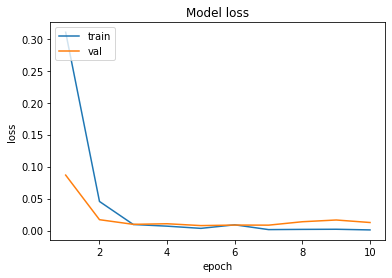

In [19]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It's not bad result !!

In [20]:
predict_data = predict_index
p_data = pad_sequences(predict_data, maxlen=max_len)
print("data shape: ", p_data.shape)

data shape:  (1626, 414)


In [21]:
print(p_data)

[[   0    0    0 ... 1819  175   71]
 [   0    0    0 ...   49  295   76]
 [   0    0    0 ...  431    6   71]
 ...
 [   0    0    0 ... 1200 1806   71]
 [   0    0    0 ...  176  177  178]
 [   0    0    0 ...  176  177  178]]


Predict data pre-processing

In [22]:
from pandas import DataFrame as df
y_pred = model.predict_classes(p_data)
auc_pred = model.predict_proba(p_data)
auc_pred_smis = [auc_pred[n][0] for n in range(len(auc_pred))]
auc_pred_df = df(data={'smishing' : auc_pred_smis})
y_pred_smis = [y_pred[n][0] for n in range(len(y_pred))]
y_pred_df = df(data={'smishing' : y_pred_smis})

In [23]:
test_pred_df = pd.concat([predict,y_pred_df],axis=1)
sub_pred_df = pd.concat([predict,auc_pred_df],axis=1)

In [24]:
counter = []
for n in y_pred_df.index:
    if y_pred_df['smishing'][n] == 1:
        counter.append(y_pred_df['smishing'][n])
        
print(len(counter)) # You can see how many smishing data is included in predict data       

105
